In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.stats import linregress

In [2]:
wildfire_df = pd.read_csv('wildfire1900-2020.csv')
wildfire_df

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Wildfire,British Columbia,9/8/2020 12:00:00 AM,"In mid-September, serious wildfires burning in...",NaN,0.0,0.0,...,9/21/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disaster,Natural,Meteorological - Hydrological,Wildfire,Pikangikum First Nation,5/30/2019 12:00:00 AM,"In May of 2019, the Pikangikum First Nation wa...",0.0,0.0,2500.0,...,6/10/2019 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disaster,Natural,Meteorological - Hydrological,Wildfire,"High Level, Alberta",5/12/2019 12:00:00 AM,Persistent drought conditions had been recorde...,0.0,0.0,3000.0,...,8/18/2019 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Meteorological - Hydrological,Wildfire,British Columbia,8/15/2018 12:00:00 AM,British Columbia and its interior and south co...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"In August during the peak of the fire season, ...",NaN,NaN,3200,0,NaN,9/7/2018 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Disaster,Natural,Meteorological - Hydrological,Wildfire,"Lac La Biche, Alberta",5/19/1919 12:00:00 AM,"On May 19th, a wildfire had just been spotted ...",11.0,12.0,NaN,...,5/28/1919 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
112,Disaster,Natural,Meteorological - Hydrological,Wildfire,Cochrane and Matheson ON,7/29/1916 12:00:00 AM,"Cochrane and Matheson ON, July 29, 1916. Both ...",233.0,0.0,8000.0,...,7/29/1916 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
113,Disaster,Natural,Meteorological - Hydrological,Wildfire,Cochrane ON,7/11/1911 12:00:00 AM,"Cochrane and northern region ON, July 11, 1911...",73.0,0.0,200.0,...,7/11/1911 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,Disaster,Natural,Meteorological - Hydrological,Wildfire,"Southern Interior, British Columbia",7/1/1910 12:00:00 AM,1910 was an exceptional fire season across par...,5.0,0.0,0.0,...,9/1/1910 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
wildfire_df.columns

Index(['EVENT CATEGORY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'PLACE', 'EVENT START DATE', 'COMMENTS', 'FATALITIES',
       'INJURED / INFECTED', 'EVACUATED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'EVENT END DATE', 'FEDERAL DFAA PAYMENTS',
       'PROVINCIAL DFAA PAYMENTS', 'PROVINCIAL DEPARTMENT PAYMENTS',
       'MUNICIPAL COSTS', 'OGD COSTS', 'INSURANCE PAYMENTS', 'NGO PAYMENTS',
       'UTILITY - PEOPLE AFFECTED', 'MAGNITUDE'],
      dtype='object')

In [4]:
wildfire_new_df = wildfire_df[['EVENT TYPE', 'PLACE', 'EVENT START DATE']]
wildfire_new_df

,EVENT TYPE,PLACE,EVENT START DATE
0,Wildfire,British Columbia,9/8/2020 12:00:00 AM
1,Wildfire,Pikangikum First Nation,5/30/2019 12:00:00 AM
2,Wildfire,"High Level, Alberta",5/12/2019 12:00:00 AM
3,Wildfire,British Columbia,8/15/2018 12:00:00 AM
4,3200,0,NaN
...,...,...,...
111,Wildfire,"Lac La Biche, Alberta",5/19/1919 12:00:00 AM
112,Wildfire,Cochrane and Matheson ON,7/29/1916 12:00:00 AM
113,Wildfire,Cochrane ON,7/11/1911 12:00:00 AM
114,Wildfire,"Southern Interior, British Columbia",7/1/1910 12:00:00 AM


In [5]:
wildfire_new_df['EVENT TYPE'].unique()

array(['Wildfire', '3200', nan, '65000'], dtype=object)

In [6]:
print(wildfire_new_df.isnull().sum())


EVENT TYPE          1
PLACE               0
EVENT START DATE    3
dtype: int64


In [8]:
# Replace numeric values with "Flood"
wildfire_new_df['EVENT TYPE'] = wildfire_new_df['EVENT TYPE'].apply(lambda x: 'Wildfire' if pd.to_numeric(x, errors='coerce') is not None else x)
wildfire_new_df


/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/162034454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_new_df['EVENT TYPE'] = wildfire_new_df['EVENT TYPE'].apply(lambda x: 'Wildfire' if pd.to_numeric(x, errors='coerce') is not None else x)


,EVENT TYPE,PLACE,EVENT START DATE
0,Wildfire,British Columbia,9/8/2020 12:00:00 AM
1,Wildfire,Pikangikum First Nation,5/30/2019 12:00:00 AM
2,Wildfire,"High Level, Alberta",5/12/2019 12:00:00 AM
3,Wildfire,British Columbia,8/15/2018 12:00:00 AM
4,Wildfire,0,NaN
...,...,...,...
111,Wildfire,"Lac La Biche, Alberta",5/19/1919 12:00:00 AM
112,Wildfire,Cochrane and Matheson ON,7/29/1916 12:00:00 AM
113,Wildfire,Cochrane ON,7/11/1911 12:00:00 AM
114,Wildfire,"Southern Interior, British Columbia",7/1/1910 12:00:00 AM


In [9]:
print(wildfire_new_df.isnull().sum())

EVENT TYPE          0
PLACE               0
EVENT START DATE    3
dtype: int64


In [10]:
wildfire_new_df = wildfire_new_df.dropna()

In [11]:
wildfire_new_df['EVENT START DATE'] = pd.to_datetime(wildfire_new_df['EVENT START DATE'], errors='coerce')

/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/3265661981.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wildfire_new_df['EVENT START DATE'] = pd.to_datetime(wildfire_new_df['EVENT START DATE'], errors='coerce')
/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/3265661981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_new_df['EVENT START DATE'] = pd.to_datetime(wildfire_new_df['EVENT START DATE'], errors='coerce')


In [12]:
wildfire_new_df.dtypes

EVENT TYPE                  object
PLACE                       object
EVENT START DATE    datetime64[ns]
dtype: object

In [13]:
wildfire_new_df

,EVENT TYPE,PLACE,EVENT START DATE
0,Wildfire,British Columbia,2020-09-08
1,Wildfire,Pikangikum First Nation,2019-05-30
2,Wildfire,"High Level, Alberta",2019-05-12
3,Wildfire,British Columbia,2018-08-15
5,Wildfire,Ontario,2018-07-03
...,...,...,...
111,Wildfire,"Lac La Biche, Alberta",1919-05-19
112,Wildfire,Cochrane and Matheson ON,1916-07-29
113,Wildfire,Cochrane ON,1911-07-11
114,Wildfire,"Southern Interior, British Columbia",1910-07-01


In [14]:
print(wildfire_new_df.isnull().sum())

EVENT TYPE          0
PLACE               0
EVENT START DATE    0
dtype: int64


In [15]:
# Extract Year and Month into new columns
wildfire_new_df['Year'] = wildfire_new_df['EVENT START DATE'].dt.year
wildfire_new_df['Month'] = wildfire_new_df['EVENT START DATE'].dt.month

wildfire_new_df

/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/3633722699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_new_df['Year'] = wildfire_new_df['EVENT START DATE'].dt.year
/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/3633722699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_new_df['Month'] = wildfire_new_df['EVENT START DATE'].dt.month


,EVENT TYPE,PLACE,EVENT START DATE,Year,Month
0,Wildfire,British Columbia,2020-09-08,2020,9
1,Wildfire,Pikangikum First Nation,2019-05-30,2019,5
2,Wildfire,"High Level, Alberta",2019-05-12,2019,5
3,Wildfire,British Columbia,2018-08-15,2018,8
5,Wildfire,Ontario,2018-07-03,2018,7
...,...,...,...,...,...
111,Wildfire,"Lac La Biche, Alberta",1919-05-19,1919,5
112,Wildfire,Cochrane and Matheson ON,1916-07-29,1916,7
113,Wildfire,Cochrane ON,1911-07-11,1911,7
114,Wildfire,"Southern Interior, British Columbia",1910-07-01,1910,7


In [16]:
# Count flood occurrences per year and area
wildfire_counts = wildfire_new_df.groupby(['Year']).size().reset_index(name='Count')
wildfire_counts

,Year,Count
0,1903,1
1,1910,1
2,1911,1
3,1916,1
4,1919,1
5,1922,1
6,1931,1
7,1936,1
8,1938,1
9,1941,1


/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/4254051462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wildfire_counts, x='Year', y='Count', palette='viridis')
/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_47963/4254051462.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Affected Area', bbox_to_anchor=(1.05, 1), loc='upper left')


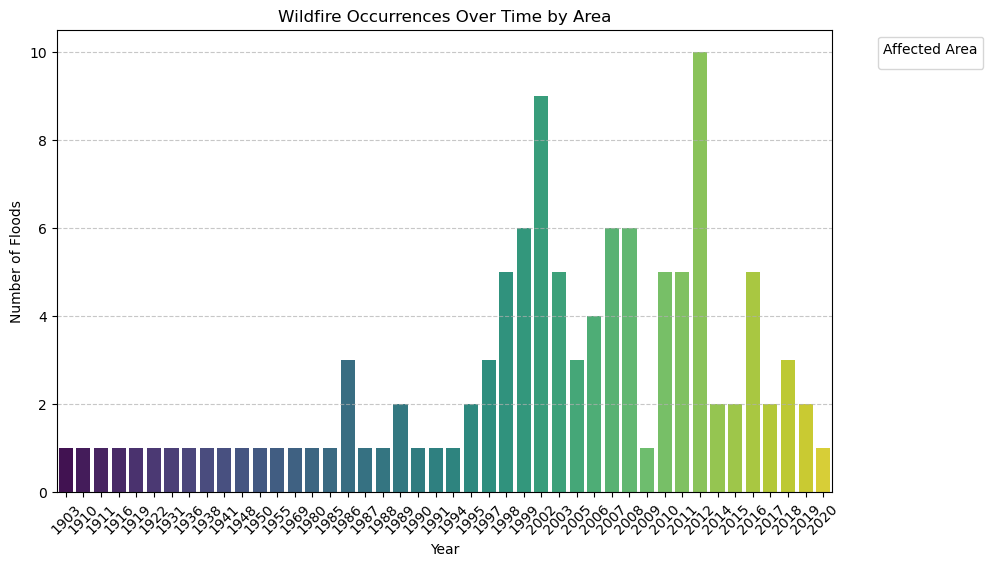

In [17]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=wildfire_counts, x='Year', y='Count', palette='viridis')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.title('Wildfire Occurrences Over Time by Area')
plt.legend(title='Affected Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

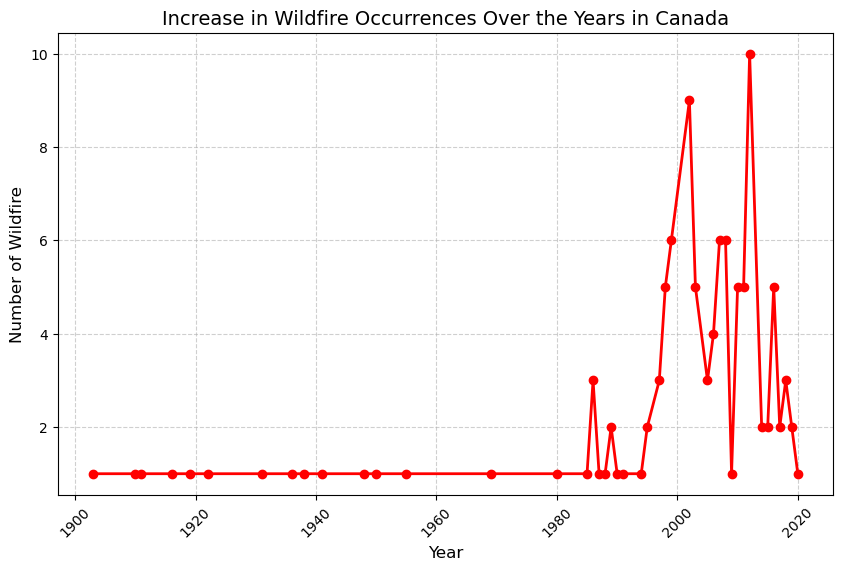

In [18]:
import numpy as np

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(wildfire_counts['Year'], wildfire_counts['Count'], marker='o', linestyle='-', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Wildfire', fontsize=12)
plt.title('Increase in Wildfire Occurrences Over the Years in Canada', fontsize=14)

# Set x-axis ticks at 20-year intervals
x_ticks = np.arange(1900, wildfire_counts['Year'].max() + 1, 20)  # Adjust the range as needed
plt.xticks(x_ticks, rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

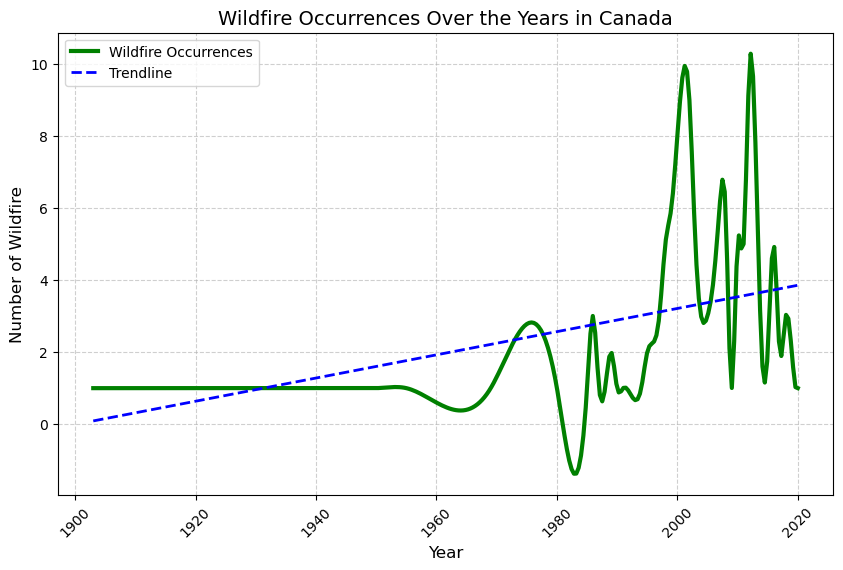

In [21]:
# Sort data by Year (if not already sorted)
wildfire_counts = wildfire_counts.sort_values(by='Year')

# Extract X (Years) and Y (Flood Counts)
X = wildfire_counts['Year']
Y = wildfire_counts['Count']

# Generate smooth X values for interpolation
X_smooth = np.linspace(X.min(), X.max(), 300)

# Create a cubic spline interpolation for a smooth flood occurrences line
spline = make_interp_spline(X, Y, k=3)
Y_smooth = spline(X_smooth)

# Compute the linear trendline
slope, intercept, _, _, _ = linregress(X, Y)
trendline_Y = slope * X + intercept  # Y-values for the trendline

# Plot
plt.figure(figsize=(10, 6))

# Smooth flood occurrences line
plt.plot(X_smooth, Y_smooth, color='green', linewidth=3, label='Wildfire Occurrences')

# Linear trendline
plt.plot(X, trendline_Y, color='blue', linestyle='dashed', linewidth=2, label='Trendline')

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Wildfire', fontsize=12)
plt.title('Wildfire Occurrences Over the Years in Canada', fontsize=14)

# Set x-axis ticks at 20-year intervals
plt.xticks(np.arange(1900, X.max() + 1, 20), rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [22]:
# Count flood occurrences per year and place
wildfire_counts2 = wildfire_new_df.groupby(['Year', 'PLACE']).size().reset_index(name='Count')
wildfire_counts2

,Year,PLACE,Count
0,1903,"Hopewell Cape, New Brunswick",1
1,1910,"Southern Interior, British Columbia",1
2,1911,Cochrane ON,1
3,1916,Cochrane and Matheson ON,1
4,1919,"Lac La Biche, Alberta",1
...,...,...,...
108,2018,"Little Grand Rapids, Manitoba",1
109,2018,Ontario,1
110,2019,"High Level, Alberta",1
111,2019,Pikangikum First Nation,1


In [23]:
wildfire_counts2.to_csv("wildfire_cleaned.csv", index=False)